In [2]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 븐류
# from sklearn.neighbors import KNeighborsRegressor # 회귀- 예측
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import glob, os.path, re

matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

선형회귀

In [3]:
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [4]:
df.info() # null, 0, 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   length   56 non-null     float64
 1    height  56 non-null     float64
 2    width   56 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB


In [5]:
df.describe()

,length,height,width
count,56.000000,56.000000,56.000000
mean,27.892857,7.862143,4.745536
std,9.021668,2.878343,1.775006
min,8.400000,2.110000,1.410000
25%,21.825000,5.690000,3.520000
50%,25.300000,6.920000,4.155000
75%,36.625000,10.850000,6.450000
max,44.000000,12.800000,8.140000


In [6]:
# target
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [7]:
train_input, test_input, train_target, test_target = train_test_split(
     perch_full,perch_weight,random_state=42
)

train_input

array([[19.6 ,  5.14,  3.04],
       [22.  ,  5.88,  3.52],
       [18.7 ,  5.2 ,  3.12],
       [17.4 ,  4.59,  2.94],
       [36.  , 10.61,  6.74],
       [25.  ,  6.44,  3.68],
       [40.  , 11.93,  7.11],
       [39.  , 12.43,  7.35],
       [43.  , 11.93,  7.28],
       [22.  ,  5.64,  3.52],
       [20.  ,  5.08,  2.77],
       [22.  ,  6.11,  3.52],
       [24.  ,  7.29,  3.72],
       [27.5 ,  7.17,  4.34],
       [43.  , 12.51,  7.42],
       [40.  , 11.73,  7.22],
       [24.  ,  6.38,  3.82],
       [21.  ,  5.92,  3.31],
       [27.5 ,  7.05,  4.34],
       [40.  , 12.38,  7.46],
       [32.8 , 10.03,  6.02],
       [26.5 ,  7.17,  4.14],
       [36.5 , 10.88,  6.86],
       [13.7 ,  3.53,  2.  ],
       [22.7 ,  5.95,  3.63],
       [15.  ,  3.82,  2.43],
       [37.  , 10.57,  6.37],
       [35.  , 11.49,  7.8 ],
       [28.7 ,  7.59,  4.64],
       [23.5 ,  6.28,  3.72],
       [39.  , 11.14,  6.  ],
       [21.  ,  5.69,  3.56],
       [23.  ,  5.22,  3.63],
       [22

In [8]:
# 데이터 훈련**2
lr = LinearRegression()
lr.fit(train_input,train_target)


LinearRegression()

In [9]:
lr.score(train_input, train_target)

0.9559326821885706

In [10]:
lr.score(test_input, test_target)

0.8796419177546367

In [11]:
train_input.shape

(42, 3)

In [12]:
from sklearn.preprocessing import PolynomialFeatures

# degree=2
poly = PolynomialFeatures(degree=3,include_bias=False)
poly.fit([[2,3]])
poly.transform([[2,3]])

array([[ 2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.]])

In [13]:
# 특성을 추가해서 모델적용 - Feature = 컬럼
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3,include_bias=False) #include_bias=False : 1값이 사라짐
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [14]:
train_poly.shape

(42, 19)

In [15]:
# 데이터 훈련**2
lr = LinearRegression()
lr.fit(train_poly,train_target)

LinearRegression()

In [16]:
lr.score(test_poly,test_target)

0.9410534492198891

In [17]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3'], dtype=object)

In [18]:
# 특성을 추가해서 모델적용 - Feature = 컬럼
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3,include_bias=False) #include_bias=False : 1값이 사라짐
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [19]:
train_poly.shape

(42, 19)

In [20]:
lr.score(train_poly,train_target)

0.9963872340980141

In [21]:
lr.score(test_poly,test_target)

0.9410534492198891

규제 - 릿지규제(회귀), 라쏘규제(회귀)

선형회귀에서 특성의 값이 많이 늘어났을때, 특성의 값을 규제, test세트에서도 제대로 예측할 수 있도록 함.


In [22]:
# 릿지회귀, 라쏘회귀를 적용을 시키려면
# 표준화 작업을 해줘야함.
# (데이터-평균)/표준편차

In [23]:
from sklearn.preprocessing import StandardScaler # 표준화작업 클래스

# 표준화 작업
ss = StandardScaler()
ss.fit(train_poly) # 표준화 적용

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [24]:
# 릿지규제
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled,train_target)

Ridge()

In [25]:
ridge.score(train_scaled,train_target)

0.989249651228496

In [26]:
ridge.score(test_scaled,test_target)

0.9828006912621816

In [27]:
# 선형회귀
# 특성값 추가 변경
# 결과가 잘나오지 않는다면 특성값 변경 필요
# 규제
# 과대적합 해소

In [28]:
# 릿지회귀에서도 강도를 어느정도로 할 지에 따라, 예측률이 높아지는 형태가 나옴.
# 강도를 점점 높아지게. 
# Ridge(alpha=1) -> 값을 늘여봄
# for문을 사용해서 alpha 값을 조정

# 그래프 적용을 위해 배열
train_score =[]
test_score = []

alpha_list = [0.001,0.01,0.1,1,10,100] # 0.001~100 까지 적용시켜 예측률

for alpha in alpha_list:
     # 규제를 적용한 훈련
     ridge = Ridge(alpha=alpha)
     ridge.fit(train_scaled,train_target)
     train1 =ridge.score(train_scaled,train_target)
     test1 = ridge.score(test_scaled,test_target)
     train_score.append(train1) #리스트에 추가
     test_score.append(test1) #리스트에 추가
     


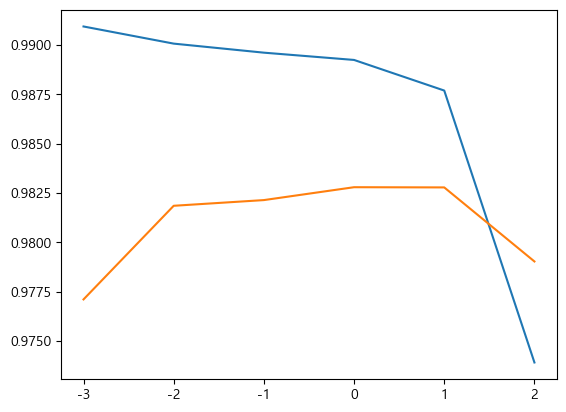

In [29]:
# x축 눈금
# g1 = [1,2,3,4,5,6]
# g1 = np.arange(1,7).reshape(-1,1)
g1 = np.log10(alpha_list)
plt.plot(g1,train_score)
plt.plot(g1,test_score)
plt.show()

In [30]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)

print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9896184558436645
0.9821480083389695
